In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv("../Datasets/category_csvs/Technology_stocks_data.csv")

# Basic Dataset Overview

In [3]:
print("Dataset Shape:", df.shape)
print("\nColumn Names and Types:")
print(df.dtypes)
print("\nFirst few rows:")
df.head()

Dataset Shape: (47362, 15)

Column Names and Types:
Stock_symbol            object
Date                    object
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                 float64
negative               float64
neutral                float64
positive               float64
article_count            int64
predicted_sentiment     object
has_news                  bool
category                object
dtype: object

First few rows:


,Stock_symbol,Date,Open,High,Low,Close,Adj Close,Volume,negative,neutral,positive,article_count,predicted_sentiment,has_news,category
0,CRM,2020-02-04,188.000000,189.690002,186.649994,188.339996,188.339996,3983200.0,0.116890,0.405206,0.477904,2,positive,True,Technology
1,CRM,2020-02-24,178.789993,187.149994,178.789993,185.940002,185.940002,8463300.0,0.913498,0.012942,0.073560,1,negative,True,Technology
2,CRM,2020-03-03,178.410004,178.419998,167.089996,169.369995,169.369995,8323500.0,0.000000,1.000000,0.000000,0,neutral,False,Technology
3,CRM,2020-03-04,172.250000,175.809998,169.630005,175.690002,175.690002,5846300.0,0.000000,1.000000,0.000000,0,neutral,False,Technology
4,CRM,2020-03-10,157.229996,161.470001,151.000000,161.339996,161.339996,11443900.0,0.000000,1.000000,0.000000,0,neutral,False,Technology


In [4]:
print("Basic Statistics:")
df.describe()

Basic Statistics:


,Open,High,Low,Close,Adj Close,Volume,negative,neutral,positive,article_count
count,47362.000000,47362.000000,47362.000000,47362.000000,4.736200e+04,4.736200e+04,47362.000000,47362.000000,47362.000000,47362.000000
mean,197.886115,197.249000,195.065553,195.798367,4.916927e+06,4.412500e+06,0.145346,0.667966,0.186688,1.643744
std,172.553689,171.738347,170.274544,170.910687,1.813054e+07,8.982562e+06,0.244234,0.419684,0.285347,3.998183
min,7.810000,8.170000,7.430000,7.830000,7.539714e+00,8.000000e+00,0.000000,0.006044,0.000000,0.000000
25%,78.290001,78.599998,77.199997,78.050003,8.786104e+01,2.680000e+02,0.000000,0.182378,0.000000,0.000000
50%,144.600006,143.429993,142.490005,141.899086,2.507574e+02,1.074700e+06,0.000000,1.000000,0.000000,0.000000
75%,257.007507,257.697510,253.119995,256.045135,9.750000e+05,4.296550e+06,0.219449,1.000000,0.346346,2.000000
max,1525.069946,1532.105957,1521.400024,1526.689941,3.743368e+08,1.822699e+08,0.960918,1.000000,0.954096,99.000000


In [5]:
print("Missing Values:")
print(df.isnull().sum())
print("\nMissing Value Percentages:")
print((df.isnull().sum() / len(df) * 100).round(2))

Missing Values:
Stock_symbol           0
Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
negative               0
neutral                0
positive               0
article_count          0
predicted_sentiment    0
has_news               0
category               0
dtype: int64

Missing Value Percentages:
Stock_symbol           0.0
Date                   0.0
Open                   0.0
High                   0.0
Low                    0.0
Close                  0.0
Adj Close              0.0
Volume                 0.0
negative               0.0
neutral                0.0
positive               0.0
article_count          0.0
predicted_sentiment    0.0
has_news               0.0
category               0.0
dtype: float64


In [6]:
print("Unique stocks in dataset:", df['Stock_symbol'].nunique())
print("\nStock distribution:")
print(df['Stock_symbol'].value_counts())

Unique stocks in dataset: 48

Stock distribution:
Stock_symbol
CRM     1005
FICO    1005
IBM     1005
ADBE    1005
MPWR    1005
TRMB    1005
TYL     1005
DELL    1005
TXN     1005
WDAY    1005
ANET    1005
FTNT    1005
NTAP    1005
AKAM    1005
AVGO    1005
CRWD    1005
DDOG    1005
FDS     1005
FFIV    1005
HPE     1005
INTC    1005
AMAT    1005
QCOM    1005
BR      1005
AMD     1005
NVDA    1005
ORCL    1005
PANW    1005
SWKS    1005
VRSN    1005
GLW     1005
HPQ     1005
ON      1005
TER     1005
ADSK    1005
GOOG    1005
MU      1005
NOW     1005
AAPL    1005
GDDY    1005
KLAC    1005
LRCX    1005
MSFT    1005
ZBRA    1005
EPAM    1005
ADI     1005
CDNS    1005
SMCI     127
Name: count, dtype: int64


# Feature Engineering

In [7]:
df = df.sort_values(["Stock_symbol", "Date"]).reset_index(drop=True)

## Momentum Features

In [8]:
g = df.groupby("Stock_symbol")

df["Return_1d"]  = g["Adj Close"].pct_change(1)
df["Return_5d"]  = g["Adj Close"].pct_change(5)
df["Return_20d"] = g["Adj Close"].pct_change(20)

In [9]:
df["MA5"]  = g["Adj Close"].transform(lambda x: x.rolling(5).mean())
df["MA20"] = g["Adj Close"].transform(lambda x: x.rolling(20).mean())

df["MA5_Ratio"]  = df["Adj Close"] / df["MA5"]
df["MA20_Ratio"] = df["Adj Close"] / df["MA20"]

In [10]:
df["Trend_5_20"] = (df["MA5"] - df["MA20"]) / df["MA20"]

In [11]:
df["High_20"] = g["High"].transform(lambda x: x.rolling(20).max())
df["Low_20"]  = g["Low"].transform(lambda x: x.rolling(20).min())

df["Dist_20High"] = (df["Adj Close"] - df["High_20"]) / df["High_20"]
df["Dist_20Low"]  = (df["Adj Close"] - df["Low_20"]) / df["Low_20"]

## Volatility Features

In [12]:
df["Vol_5d"]  = g["Return_1d"].transform(lambda x: x.rolling(5).std())
df["Vol_20d"] = g["Return_1d"].transform(lambda x: x.rolling(20).std())

In [13]:
df["Vol_Ratio"] = df["Vol_5d"] / df["Vol_20d"]

In [14]:
prev_close = g["Adj Close"].shift(1)
df["Gap"] = (df["Open"] - prev_close) / prev_close

## Volume Features

In [15]:
df["Vol_Change"] = g["Volume"].pct_change()

In [16]:
df["Vol_MA20"] = g["Volume"].transform(lambda x: x.rolling(20).mean())

df["Vol_Ratio_20"] = df["Volume"] / df["Vol_MA20"]

In [17]:
df["PV_Score"] = df["Return_1d"] * df["Vol_Ratio_20"]

In [18]:
df["Vol_MA5"] = g["Volume"].transform(lambda x: x.rolling(5).mean())

df["Vol_Trend"] = df["Vol_MA5"] / df["Vol_MA20"]

## Sentiment Features

In [19]:
df["Sent_Net"] = df["positive"] - df["negative"]

In [20]:
df["Sent_MA5"] = g["Sent_Net"].transform(
    lambda x: x.rolling(5).mean()
)

In [21]:
df["Sent_Mom5"] = g["Sent_Net"].diff(5)

In [22]:
df["Art_MA20"] = g["article_count"].transform(
    lambda x: x.rolling(20).mean()
)

df["News_Intensity"] = df["article_count"] / df["Art_MA20"]

## Lag Features

In [23]:
df["Ret_Lag1"]  = g["Return_1d"].shift(1)
df["Ret_Lag5"]  = g["Return_5d"].shift(5)
df["Sent_Lag3"] = g["Sent_Net"].shift(3)

In [24]:
features = [
    # Momentum
    "Return_1d","Return_5d","Return_20d",
    "MA5_Ratio","MA20_Ratio","Trend_5_20",
    "Dist_20High","Dist_20Low",

    # Volatility
    "Vol_5d","Vol_20d",
    "Vol_Ratio","Gap",

    # Volume
    "Vol_Change","Vol_Ratio_20","PV_Score","Vol_Trend",

    # Sentiment
    "Sent_Net","Sent_MA5","Sent_Mom5",
    "News_Intensity",

    # Lags
    "Ret_Lag1","Ret_Lag5","Sent_Lag3",
]

# Label Creation

## Majority Vote Label (3+ Up Days in Next 5 Days)

In [25]:
# Compute daily returns per stock
df['Daily_Return'] = g['Adj Close'].pct_change()

# Mark up/down days (1 = up, 0 = down or flat)
df['Up_Day'] = (df['Daily_Return'] > 0).astype(int)

# Count UP days in next 5 days
df['Up_Count_5d'] = g['Up_Day'].transform(
    lambda x: x.shift(-1).rolling(window=5, min_periods=5).sum()
)

# Majority vote (>=3 up days = UP)
df['Label'] = np.where(df['Up_Count_5d'] >= 3, 1, 0)

print("Label creation complete!")
print(f"\nRecords with labels: {df['Label'].notna().sum():,}")
print(f"Records without labels (end of series): {df['Label'].isna().sum():,}")

Label creation complete!

Records with labels: 47,362
Records without labels (end of series): 0


In [26]:
# Class distribution
print("\n=== LABEL DISTRIBUTION ===")
print(f"\nOverall:")
print(df['Label'].value_counts())
print(f"\nPercentages:")
print(df['Label'].value_counts(normalize=True) * 100)


=== LABEL DISTRIBUTION ===

Overall:
Label
1    24299
0    23063
Name: count, dtype: int64

Percentages:
Label
1    51.304844
0    48.695156
Name: proportion, dtype: float64


In [27]:
# Label distribution by stock
print("\n=== LABEL DISTRIBUTION BY STOCK ===")
label_by_stock = df.groupby('Stock_symbol')['Label'].value_counts(normalize=True).unstack(fill_value=0)
print(label_by_stock)


=== LABEL DISTRIBUTION BY STOCK ===
Label                0         1
Stock_symbol                    
AAPL          0.576119  0.423881
ADBE          0.520398  0.479602
ADI           0.531343  0.468657
ADSK          0.490547  0.509453
AKAM          0.526368  0.473632
AMAT          0.540299  0.459701
AMD           0.563184  0.436816
ANET          0.535323  0.464677
AVGO          0.487562  0.512438
BR            0.565174  0.434826
CDNS          0.429851  0.570149
CRM           0.466667  0.533333
CRWD          0.438806  0.561194
DDOG          0.452736  0.547264
DELL          0.471642  0.528358
EPAM          0.519403  0.480597
FDS           0.562189  0.437811
FFIV          0.527363  0.472637
FICO          0.525373  0.474627
FTNT          0.423881  0.576119
GDDY          0.473632  0.526368
GLW           0.499502  0.500498
GOOG          0.421891  0.578109
HPE           0.475622  0.524378
HPQ           0.439801  0.560199
IBM           0.516418  0.483582
INTC          0.498507  0.501493
KLAC  

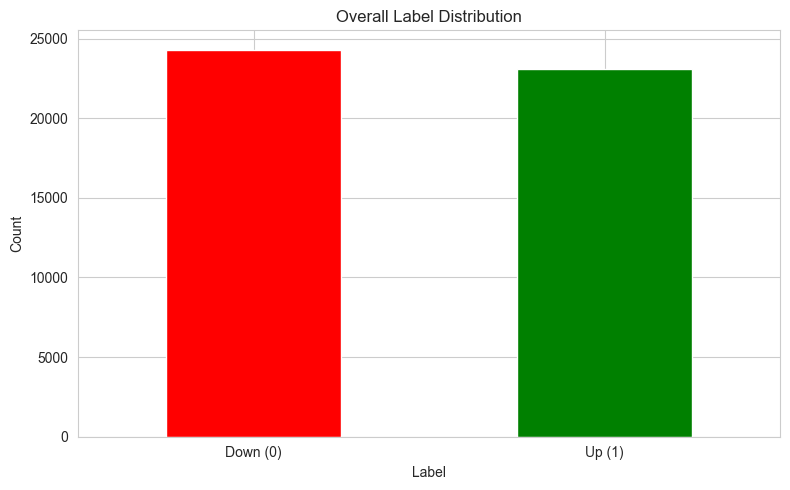

In [49]:
# Visualize label balance
fig, ax = plt.subplots(figsize=(8, 5))

# Overall distribution
df['Label'].value_counts().plot(kind='bar', ax=ax, color=['red', 'green'])
ax.set_title('Overall Label Distribution')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_xticklabels(['Down (0)', 'Up (1)'], rotation=0)

plt.tight_layout()
plt.show()

# Exploratory Data Analysis

## Feature Statistics

In [29]:
print("Engineered Features Overview:")
print(df[features].describe())

Engineered Features Overview:
          Return_1d     Return_5d    Return_20d     MA5_Ratio    MA20_Ratio  \
count  47314.000000  47122.000000  46402.000000  47170.000000  46450.000000   
mean       0.027995      0.052734      0.076573      1.002502      1.007450   
std        0.310209      0.465959      0.594308      0.185700      0.290924   
min       -0.948942     -0.974641     -0.977612      0.064625      0.054782   
25%       -0.024767     -0.050752     -0.089879      0.969861      0.931367   
50%        0.000684      0.004308      0.012304      1.000303      0.999926   
75%        0.024388      0.055086      0.114675      1.023311      1.051349   
max       22.465022     26.517703     45.417334      4.338689     11.634203   

         Trend_5_20   Dist_20High    Dist_20Low        Vol_5d       Vol_20d  \
count  46450.000000  4.645000e+04  4.645000e+04  47122.000000  46402.000000   
mean       0.003958  4.121041e+04  4.887006e+04      0.160735      0.173605   
std        0.161352  

## Stock Analysis

Analyzing CDNS


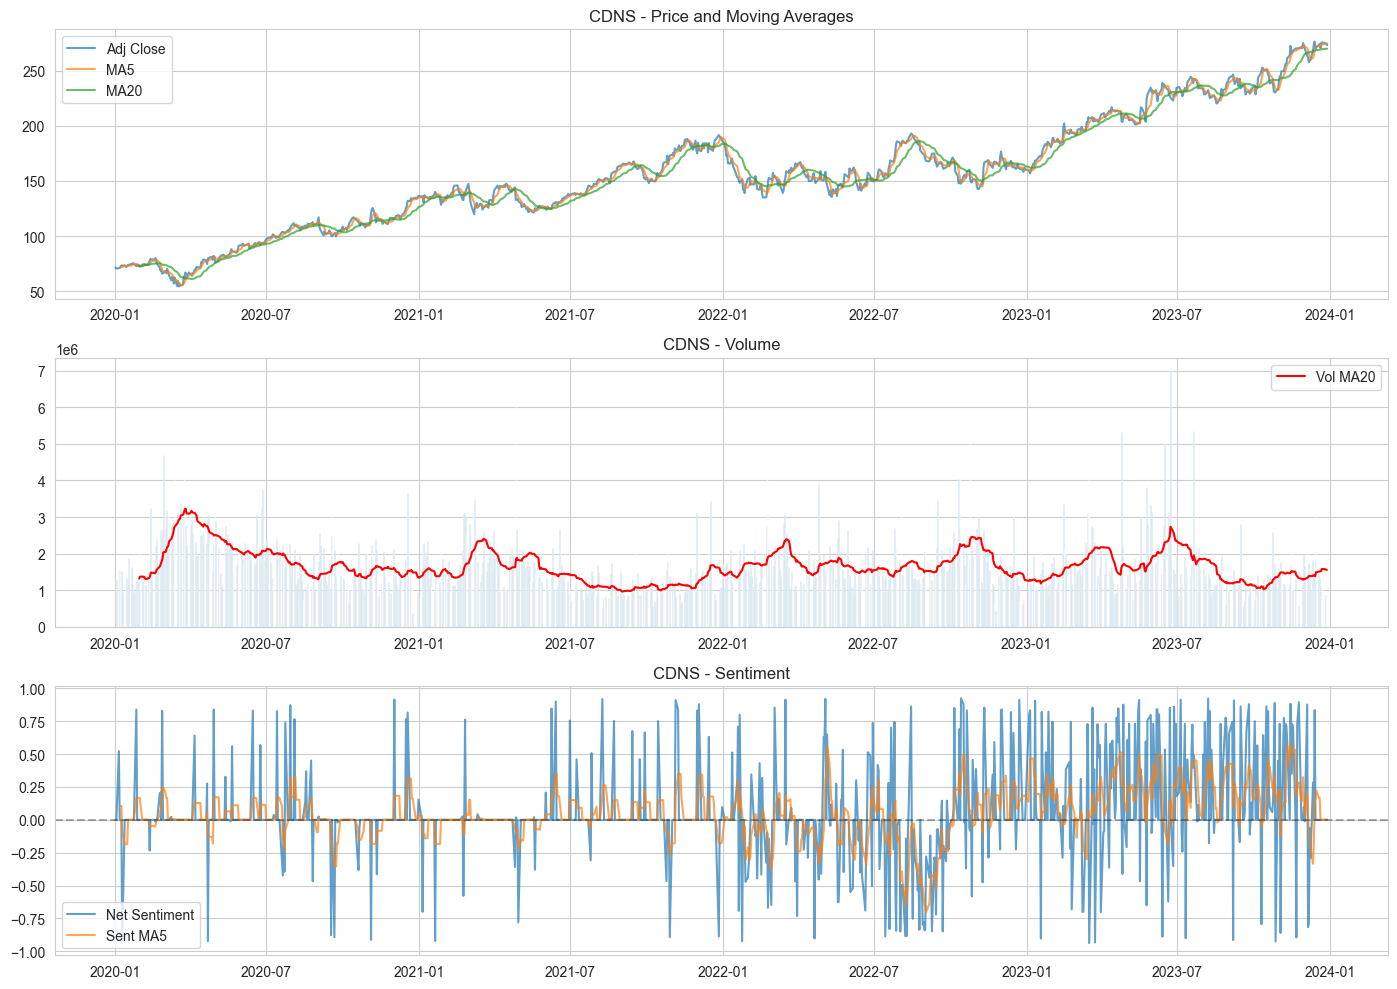

In [34]:
df['Date'] = pd.to_datetime(df['Date'])

# Sample one stock for visualization
sample_stock = df['Stock_symbol'].value_counts().index[10]
stock_data = df[df['Stock_symbol'] == sample_stock].copy()

print(f"Analyzing {sample_stock}")

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Price and moving averages
axes[0].plot(stock_data['Date'], stock_data['Adj Close'], label='Adj Close', alpha=0.7)
axes[0].plot(stock_data['Date'], stock_data['MA5'], label='MA5', alpha=0.7)
axes[0].plot(stock_data['Date'], stock_data['MA20'], label='MA20', alpha=0.7)
axes[0].set_title(f'{sample_stock} - Price and Moving Averages')
axes[0].legend()
axes[0].grid(True)

# Volume
axes[1].bar(stock_data['Date'], stock_data['Volume'], alpha=0.6)
axes[1].plot(stock_data['Date'], stock_data['Vol_MA20'], color='red', label='Vol MA20')
axes[1].set_title(f'{sample_stock} - Volume')
axes[1].legend()
axes[1].grid(True)

# Sentiment
axes[2].plot(stock_data['Date'], stock_data['Sent_Net'], label='Net Sentiment', alpha=0.7)
axes[2].plot(stock_data['Date'], stock_data['Sent_MA5'], label='Sent MA5', alpha=0.7)
axes[2].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[2].set_title(f'{sample_stock} - Sentiment')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

## Feature Groups Analysis

In [35]:
# Momentum features
momentum_features = ["Return_1d","Return_5d","Return_20d","MA5_Ratio","MA20_Ratio","Trend_5_20"]
print("Momentum Features Correlation:")
print(df[momentum_features].corr())

Momentum Features Correlation:
            Return_1d  Return_5d  Return_20d  MA5_Ratio  MA20_Ratio  \
Return_1d    1.000000   0.607826    0.546138   0.734514    0.648980   
Return_5d    0.607826   1.000000    0.674724   0.678374    0.816249   
Return_20d   0.546138   0.674724    1.000000   0.494555    0.757598   
MA5_Ratio    0.734514   0.678374    0.494555   1.000000    0.787160   
MA20_Ratio   0.648980   0.816249    0.757598   0.787160    1.000000   
Trend_5_20   0.059147   0.382592    0.504095   0.037338    0.584602   

            Trend_5_20  
Return_1d     0.059147  
Return_5d     0.382592  
Return_20d    0.504095  
MA5_Ratio     0.037338  
MA20_Ratio    0.584602  
Trend_5_20    1.000000  


In [36]:
# Volatility features
volatility_features = ["Vol_5d","Vol_20d","Vol_Ratio","Gap"]
print("Volatility Features Correlation:")
print(df[volatility_features].corr())

Volatility Features Correlation:
             Vol_5d   Vol_20d  Vol_Ratio       Gap
Vol_5d     1.000000  0.746086   0.325686 -0.652207
Vol_20d    0.746086  1.000000  -0.031364 -0.757020
Vol_Ratio  0.325686 -0.031364   1.000000 -0.020689
Gap       -0.652207 -0.757020  -0.020689  1.000000


In [37]:
# Volume features
volume_features = ["Vol_Change","Vol_Ratio_20","PV_Score","Vol_Trend"]
print("Volume Features Correlation:")
print(df[volume_features].corr())

Volume Features Correlation:
              Vol_Change  Vol_Ratio_20  PV_Score  Vol_Trend
Vol_Change      1.000000      0.649334 -0.038612   0.047482
Vol_Ratio_20    0.649334      1.000000 -0.013942   0.567839
PV_Score       -0.038612     -0.013942  1.000000  -0.001515
Vol_Trend       0.047482      0.567839 -0.001515   1.000000


In [38]:
# Sentiment features
sentiment_features = ["Sent_Net","Sent_MA5","Sent_Mom5","News_Intensity"]
print("Sentiment Features Correlation:")
print(df[sentiment_features].corr())

Sentiment Features Correlation:
                Sent_Net  Sent_MA5  Sent_Mom5  News_Intensity
Sent_Net        1.000000  0.484986   0.691210        0.082428
Sent_MA5        0.484986  1.000000   0.284314        0.017858
Sent_Mom5       0.691210  0.284314   1.000000        0.058034
News_Intensity  0.082428  0.017858   0.058034        1.000000


# Correlation Analysis with Labels

## Feature-Label Correlation

In [39]:
# Filter to rows with valid labels
df_labeled = df.dropna(subset=['Label'])

# Calculate correlation with label
correlations = df_labeled[features + ['Label']].corr()['Label'].drop('Label').sort_values(ascending=False)

print("=== FEATURE CORRELATION WITH LABEL ===\n")
print("Top 10 Positive Correlations:")
print(correlations.head(10))
print("\nTop 10 Negative Correlations:")
print(correlations.tail(10))

=== FEATURE CORRELATION WITH LABEL ===

Top 10 Positive Correlations:
MA5_Ratio         0.184503
MA20_Ratio        0.144877
Return_5d         0.125222
Gap               0.077133
Return_20d        0.057680
PV_Score          0.044835
Return_1d         0.042738
Ret_Lag1          0.036983
Trend_5_20        0.026682
News_Intensity    0.023224
Name: Label, dtype: float64

Top 10 Negative Correlations:
Sent_Mom5      -0.009384
Sent_MA5       -0.009486
Vol_Trend      -0.020672
Dist_20High    -0.029522
Dist_20Low     -0.029572
Vol_Ratio_20   -0.029669
Vol_Ratio      -0.044823
Ret_Lag5       -0.073722
Vol_20d        -0.075236
Vol_5d         -0.086446
Name: Label, dtype: float64


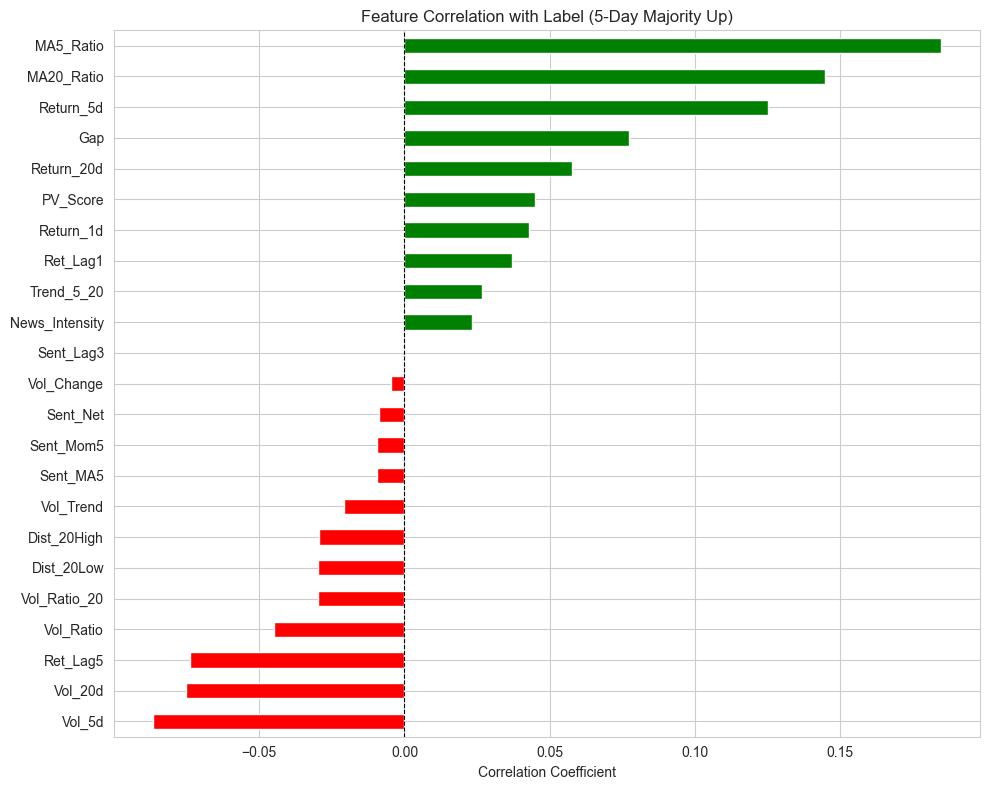

In [40]:
# Visualize feature-label correlations
fig, ax = plt.subplots(figsize=(10, 8))
correlations.sort_values().plot(kind='barh', ax=ax, color=correlations.sort_values().apply(lambda x: 'green' if x > 0 else 'red'))
ax.set_title('Feature Correlation with Label (5-Day Majority Up)')
ax.set_xlabel('Correlation Coefficient')
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

## Correlation Heatmap - All Features

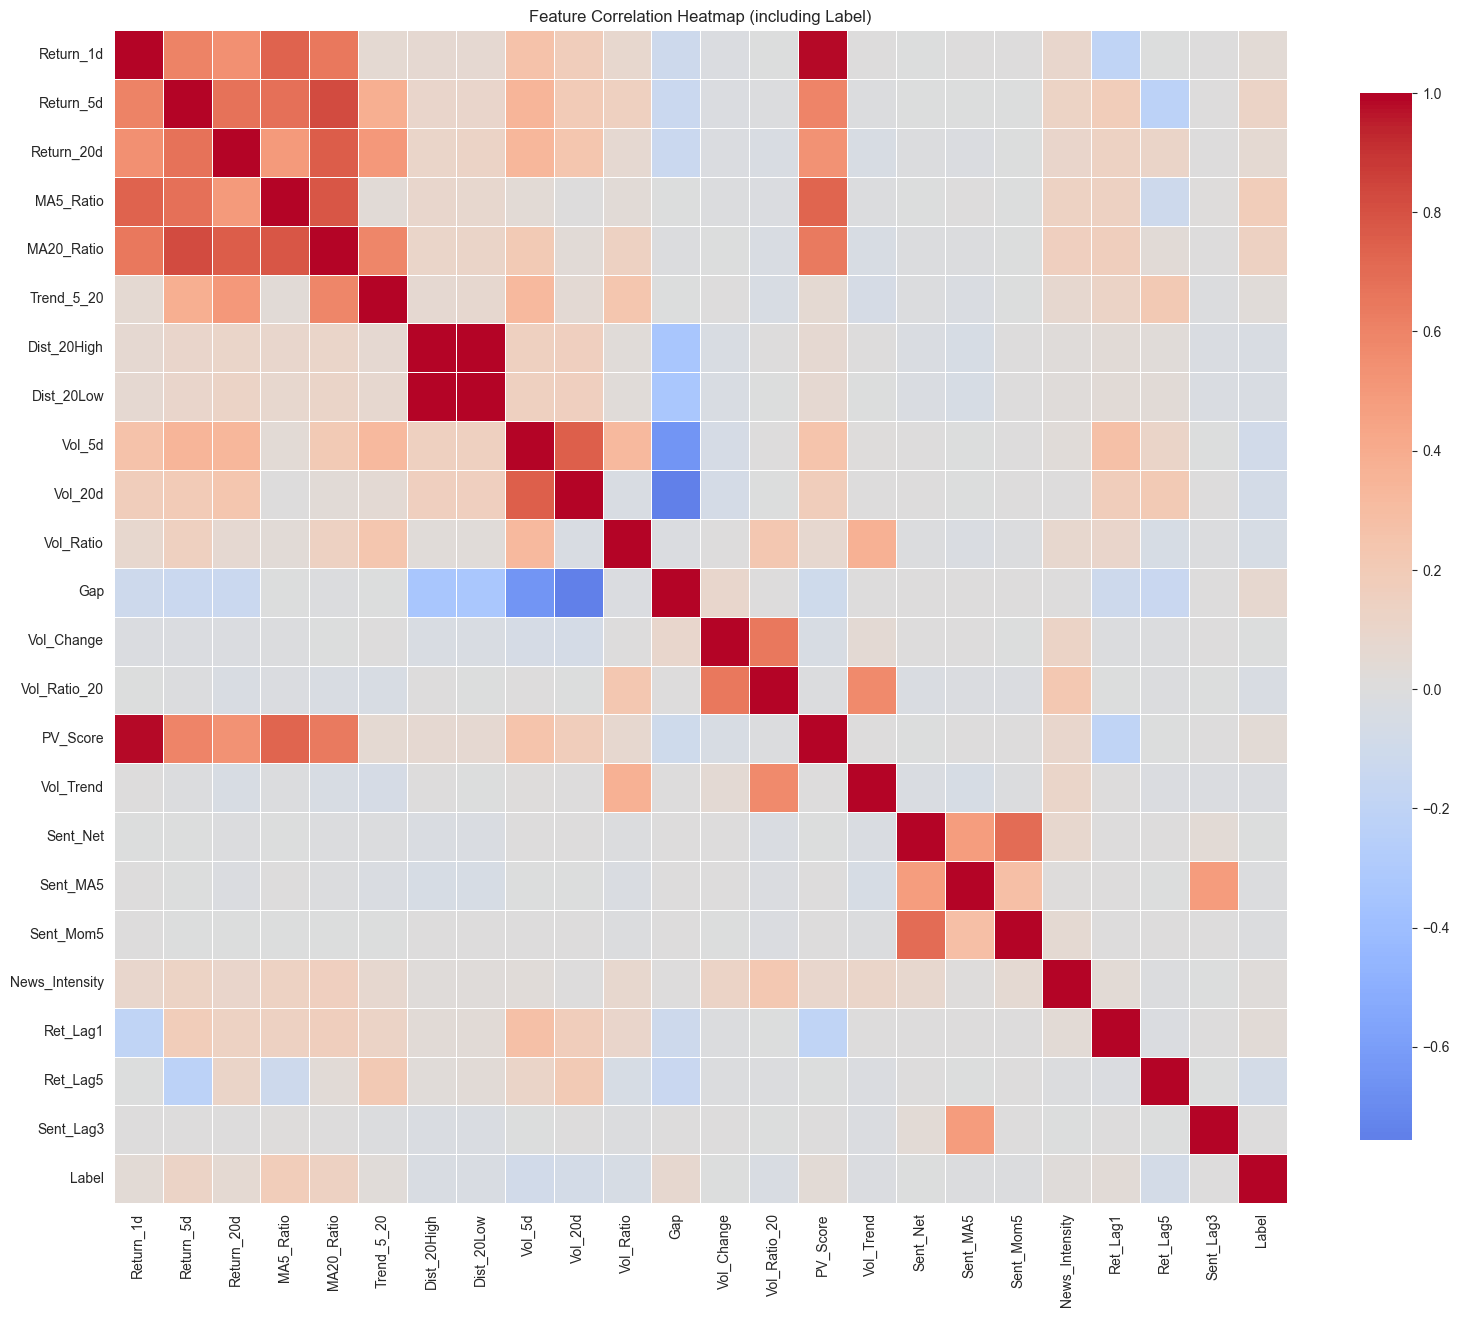

In [41]:
# Full correlation matrix
plt.figure(figsize=(16, 14))
corr_matrix = df_labeled[features + ['Label']].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap (including Label)')
plt.tight_layout()
plt.show()

## Feature Group Correlation with Label

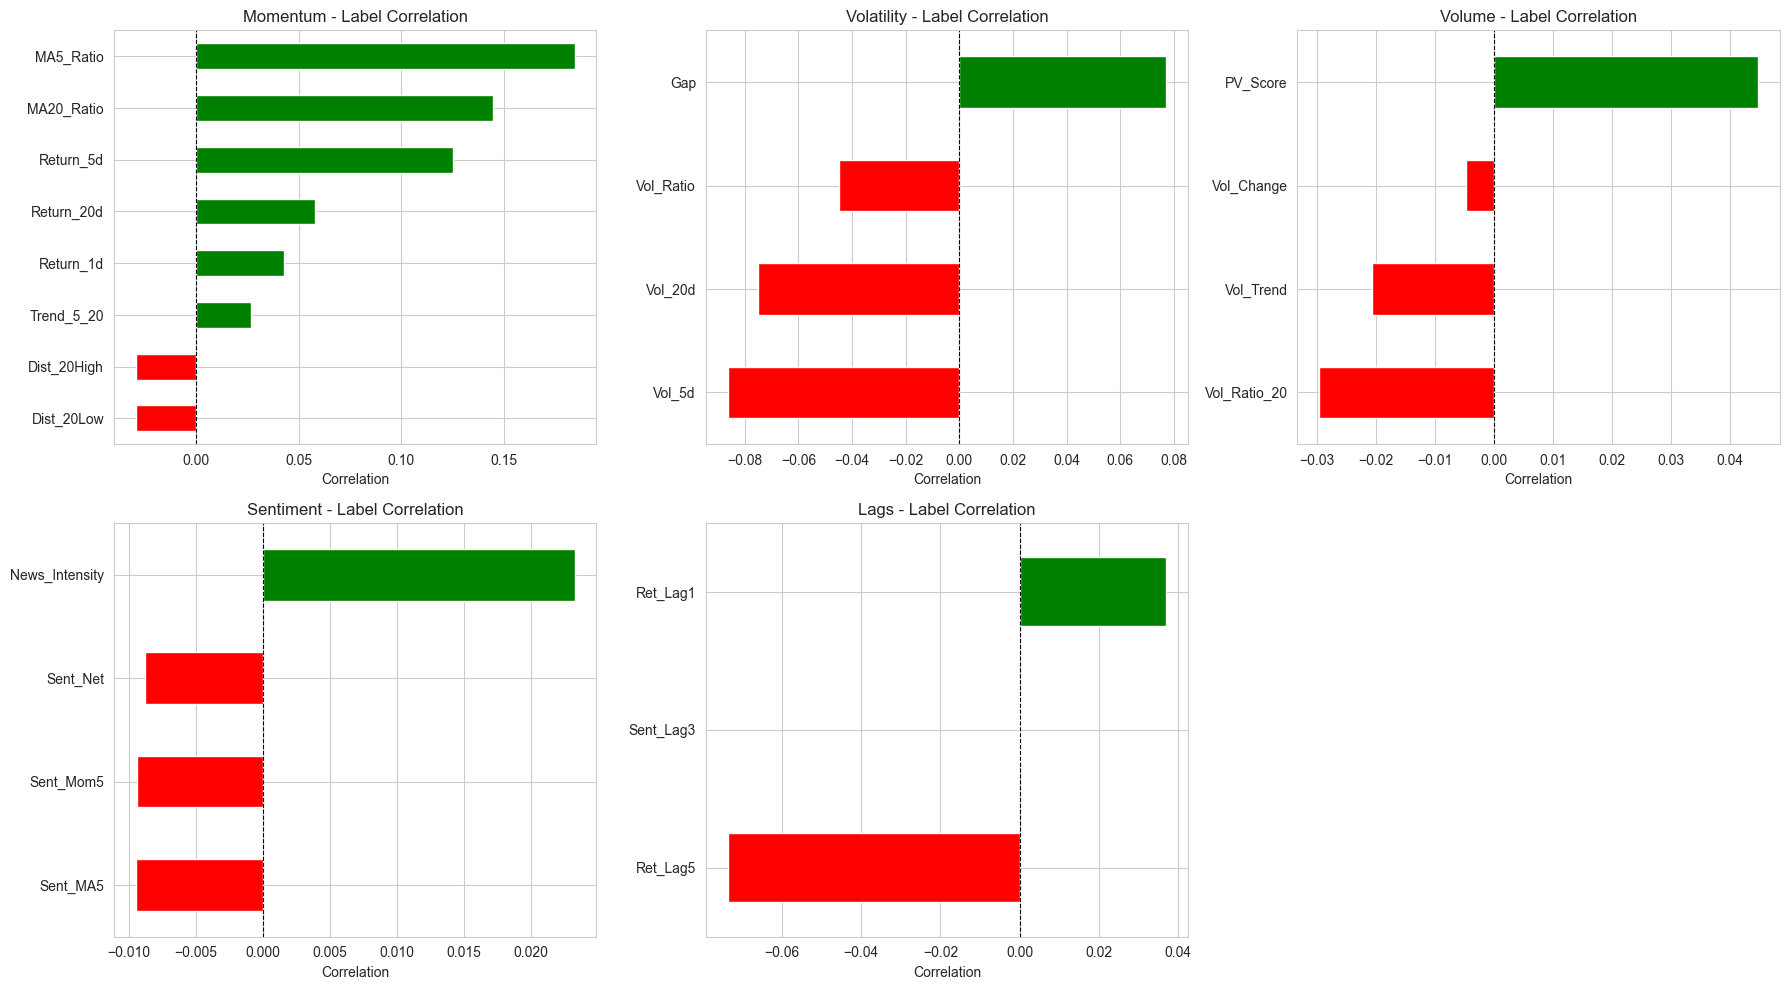

In [43]:
# Visualize by group
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (group_name, group_features) in enumerate(feature_groups.items()):
    group_corr = df_labeled[group_features + ['Label']].corr()['Label'].drop('Label').sort_values()
    group_corr.plot(kind='barh', ax=axes[idx], 
                    color=group_corr.apply(lambda x: 'green' if x > 0 else 'red'))
    axes[idx].set_title(f'{group_name} - Label Correlation')
    axes[idx].set_xlabel('Correlation')
    axes[idx].axvline(x=0, color='black', linestyle='--', linewidth=0.8)

# Hide the last subplot if we have fewer groups
if len(feature_groups) < 6:
    axes[5].axis('off')

plt.tight_layout()
plt.show()

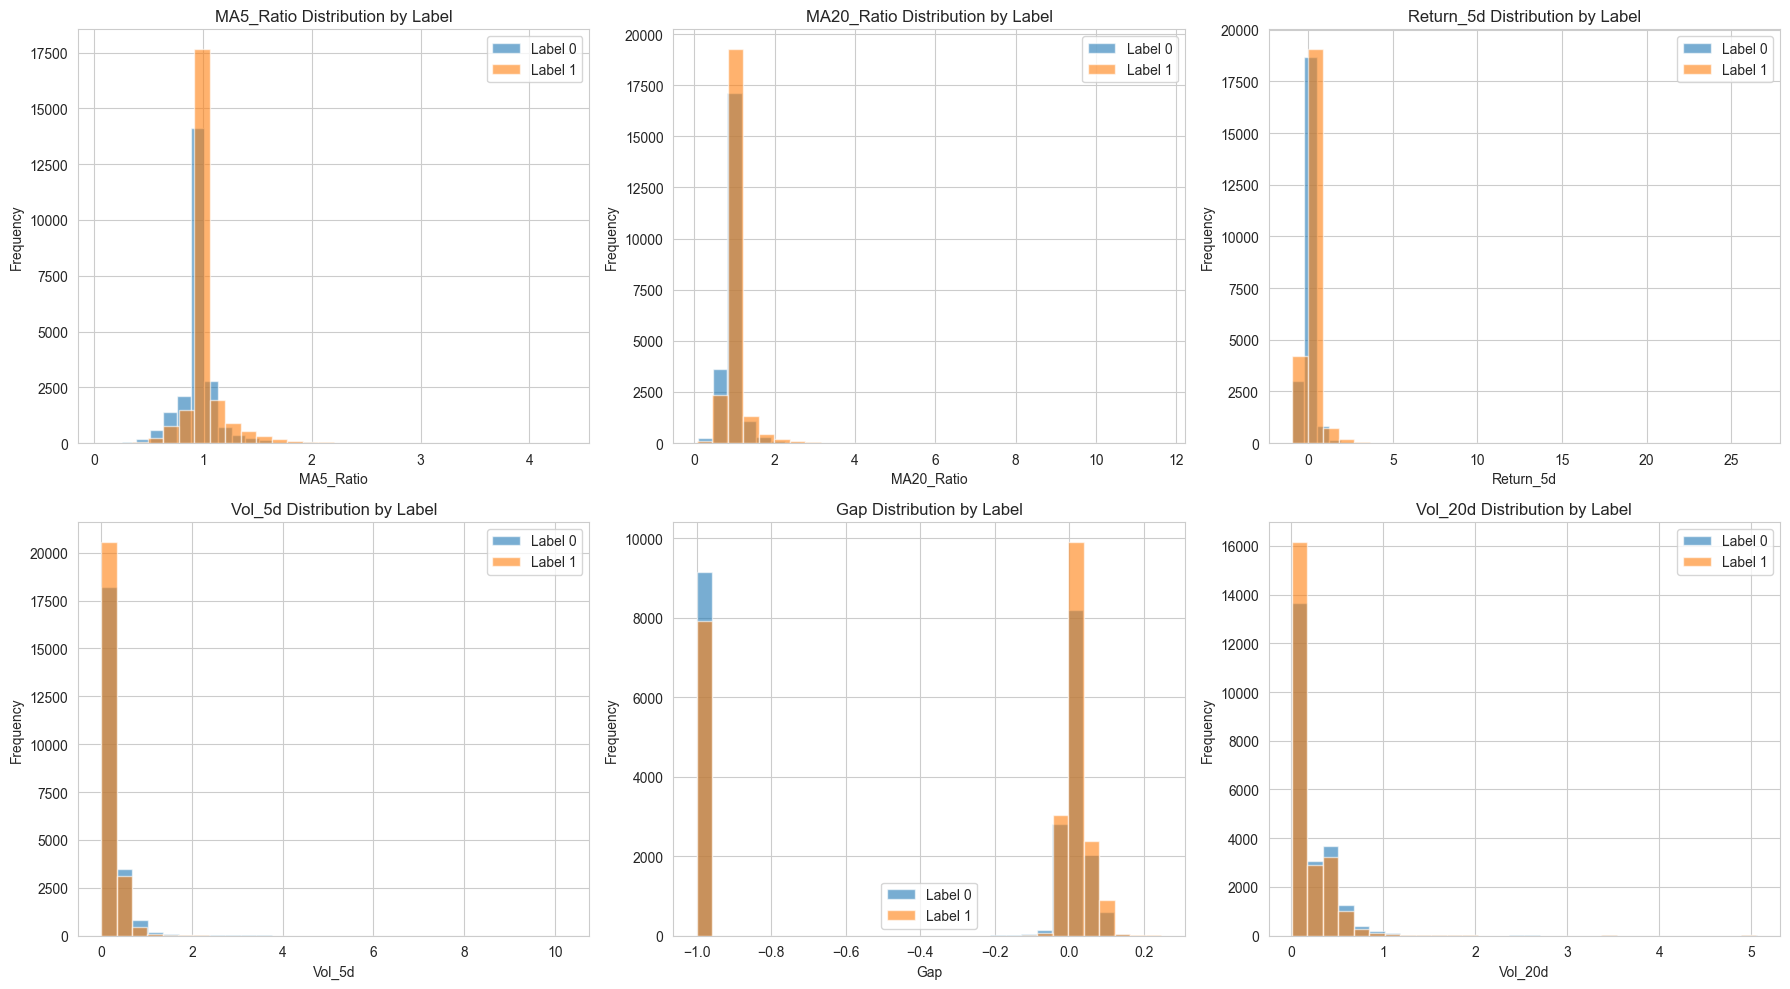

In [44]:
# Compare feature distributions for Up vs Down labels
top_features = correlations.abs().nlargest(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    for label in [0, 1]:
        data = df_labeled[df_labeled['Label'] == label][feature].dropna()
        axes[idx].hist(data, alpha=0.6, bins=30, label=f'Label {label}')
    axes[idx].set_title(f'{feature} Distribution by Label')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.show()

## Data Quality Summary

In [46]:
print("=== DATA QUALITY SUMMARY ===\n")
print(f"Total records: {len(df):,}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Number of stocks: {df['Stock_symbol'].nunique()}")
print(f"\nTotal features engineered: {len(features)}")
print(f"Records with all features: {df[features].dropna().shape[0]:,}")
print(f"Completeness: {(df[features].dropna().shape[0] / len(df) * 100):.2f}%")
print(f"\nRecords with labels: {df['Label'].notna().sum():,}")
print(f"Records with features AND labels: {df[features + ['Label']].dropna().shape[0]:,}")
print(f"Model-ready completeness: {(df[features + ['Label']].dropna().shape[0] / len(df) * 100):.2f}%")

=== DATA QUALITY SUMMARY ===

Total records: 47,362
Date range: 2020-01-02 00:00:00 to 2023-12-28 00:00:00
Number of stocks: 48

Total features engineered: 23
Records with all features: 40,538
Completeness: 85.59%

Records with labels: 47,362
Records with features AND labels: 40,538
Model-ready completeness: 85.59%
